In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [2]:
class point:
    def __init__(self):
        self.data = []
        self.classified = False
        self.cluster = 0

class dbscan:
    def __init__(self, eps, min_samples):
        self.points = []
        self.eps = eps
        self.min_samples = min_samples
        self.clusters = 0
        self.labels_ = []

    def _loadData(self, X):
        self.points = []
        for i in range(len(X)):
            p = point()
            p.data = X[i]
            self.points.append(p)

    def fit(self, X):
        self._loadData(X)
        clusterId = 1
        for i in range(len(self.points)):
            if self.points[i].classified == False:
                self.points[i].classified = True
                neighborPts = self._regionQuery(self.points[i])
                if len(neighborPts) < self.min_samples:
                    self.points[i].cluster = -1
                else:
                    self._expandCluster(self.points[i], neighborPts, clusterId)
                    clusterId = clusterId + 1

    def _regionQuery(self, p):
        distances = euclidean_distances([p.data], [pt.data for pt in self.points])[0]
        neighbors = [i for i, d in enumerate(distances) if d < self.eps]
        return neighbors

    def _expandCluster(self, p, neighborPts, clusterId):
        p.cluster = clusterId
        i = 0
        while i < len(neighborPts):
            nextPoint = self.points[neighborPts[i]]
            if not nextPoint.classified:
                nextPoint.classified = True
                nextNeighborPts = self._regionQuery(nextPoint)
                if len(nextNeighborPts) >= self.min_samples:
                    neighborPts += nextNeighborPts
            if nextPoint.cluster == 0:
                nextPoint.cluster = clusterId
            i += 1




In [10]:
def plot_results(X, labels_custom, labels_sklearn, eps, min_samples):
    '''Função para plotar os resultados obtidos'''
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    fig.suptitle(f'DBSCAN - eps:{eps} - minSamples: {min_samples}', fontsize=16)

    axes[0].scatter(X[:, 0], X[:, 1], c=labels_custom, cmap='rainbow')
    axes[0].set_title('Custom DBSCAN')

    axes[1].scatter(X[:, 0], X[:, 1], c=labels_sklearn, cmap='rainbow')
    axes[1].set_title('scikit-learn DBSCAN')

    plt.show()

def evaluate_models(X, labels_custom, labels_sklearn, eps, min_samples):
    '''Avalia e compara os modelos'''
    
    # Índice de Rand ajustado
    ari_custom = adjusted_rand_score(labels_custom, labels_custom)
    ari_sklearn = adjusted_rand_score(labels_sklearn, labels_sklearn)
    
    # Métrica de silhueta
    silhouette_custom = silhouette_score(X, labels_custom)
    silhouette_sklearn = silhouette_score(X, labels_sklearn)

    results = {
        'eps': eps,
        'min_samples': min_samples,
        'ari_custom': ari_custom,
        'ari_sklearn': ari_sklearn,
        'silhouette_custom': silhouette_custom,
        'silhouette_sklearn': silhouette_sklearn
    }

    return pd.DataFrame(data=[results])

def test_models_plot(X, eps=0.5, min_samples=5):
    model_custom = dbscan(eps=eps, min_samples=min_samples)
    model_custom.fit(X)
    labels_custom = [p.cluster for p in model_custom.points]

    dbscan_sklearn = DBSCAN(eps=eps, min_samples=min_samples)
    labels_sklearn = dbscan_sklearn.fit_predict(X)

    plot_results(X, labels_custom, labels_sklearn, eps, min_samples)
    print(evaluate_models(X, labels_custom, labels_sklearn, eps, min_samples))

def test_models(X, eps=0.5, min_samples=5):
    model_custom = dbscan(eps=eps, min_samples=min_samples)
    model_custom.fit(X)
    labels_custom = [p.cluster for p in model_custom.points]

    dbscan_sklearn = DBSCAN(eps=eps, min_samples=min_samples)
    labels_sklearn = dbscan_sklearn.fit_predict(X)

    return evaluate_models(X, labels_custom, labels_sklearn, eps, min_samples)


### Teste Inicial com a implementação própria e com a versão do scikit

In [4]:
iris = load_iris()
X = iris.data[:, :2]

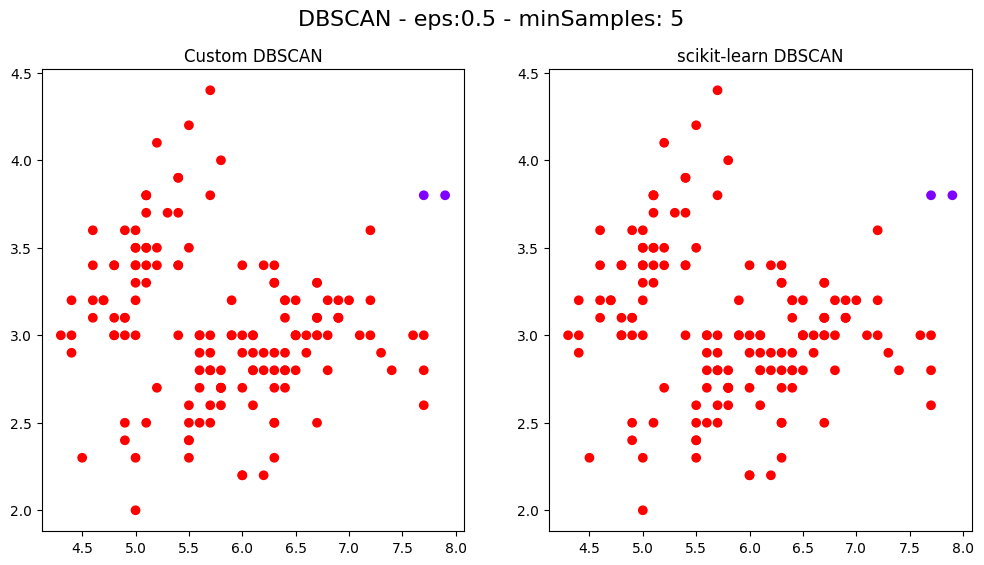

   eps  min_samples  ari_custom  ari_sklearn  silhouette_custom   
0  0.5            5         1.0          1.0           0.431843  \

   silhouette_sklearn  
0            0.431843  


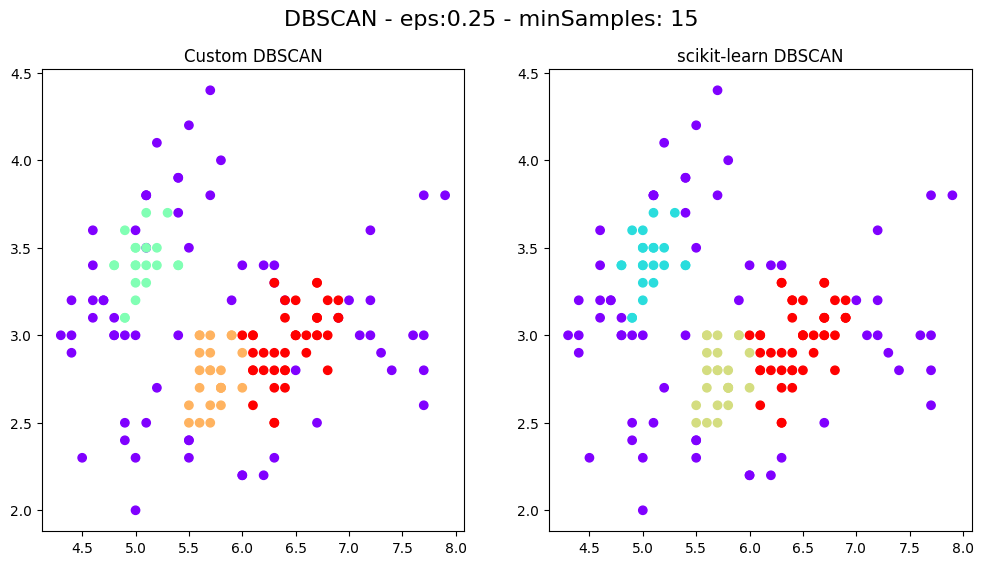

    eps  min_samples  ari_custom  ari_sklearn  silhouette_custom   
0  0.25           15         1.0          1.0           0.065342  \

   silhouette_sklearn  
0            0.116537  


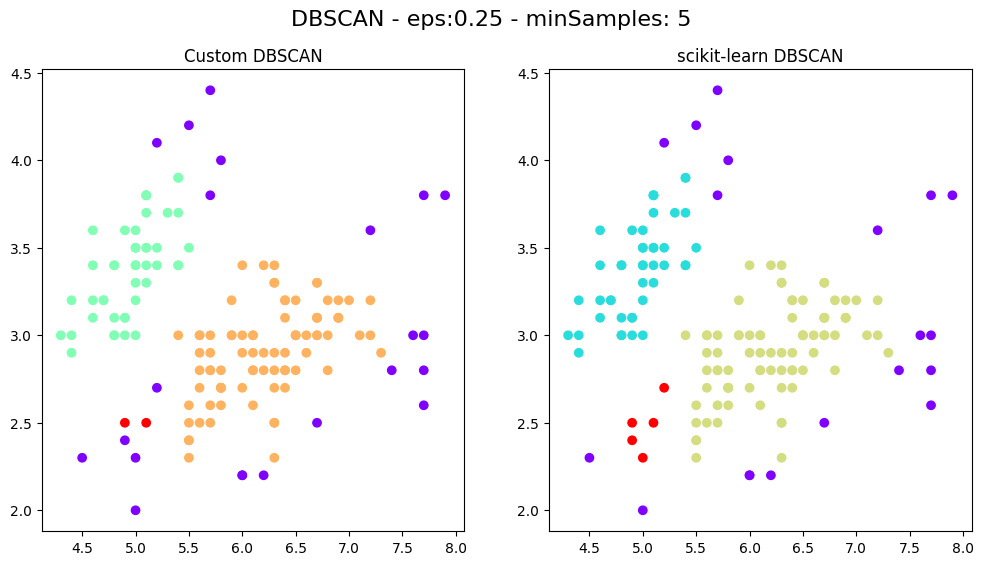

    eps  min_samples  ari_custom  ari_sklearn  silhouette_custom   
0  0.25            5         1.0          1.0           0.262556  \

   silhouette_sklearn  
0            0.295345  


In [11]:
test_models_plot(X)
test_models_plot(X, eps=0.25, min_samples=15)
test_models_plot(X, eps=0.25, min_samples=5)

In [13]:
results = pd.DataFrame()
results = test_models(X, eps=0.5, min_samples=15)
results = results.append(test_models(X, eps=0.25, min_samples=15))
results = results.append(test_models(X, eps=0.25, min_samples=5))
results = results.append(test_models(X, eps=0.25, min_samples=2))
results = results.append(test_models(X, eps=0.25, min_samples=1))

results

AttributeError: 'DataFrame' object has no attribute 'append'